## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [6]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

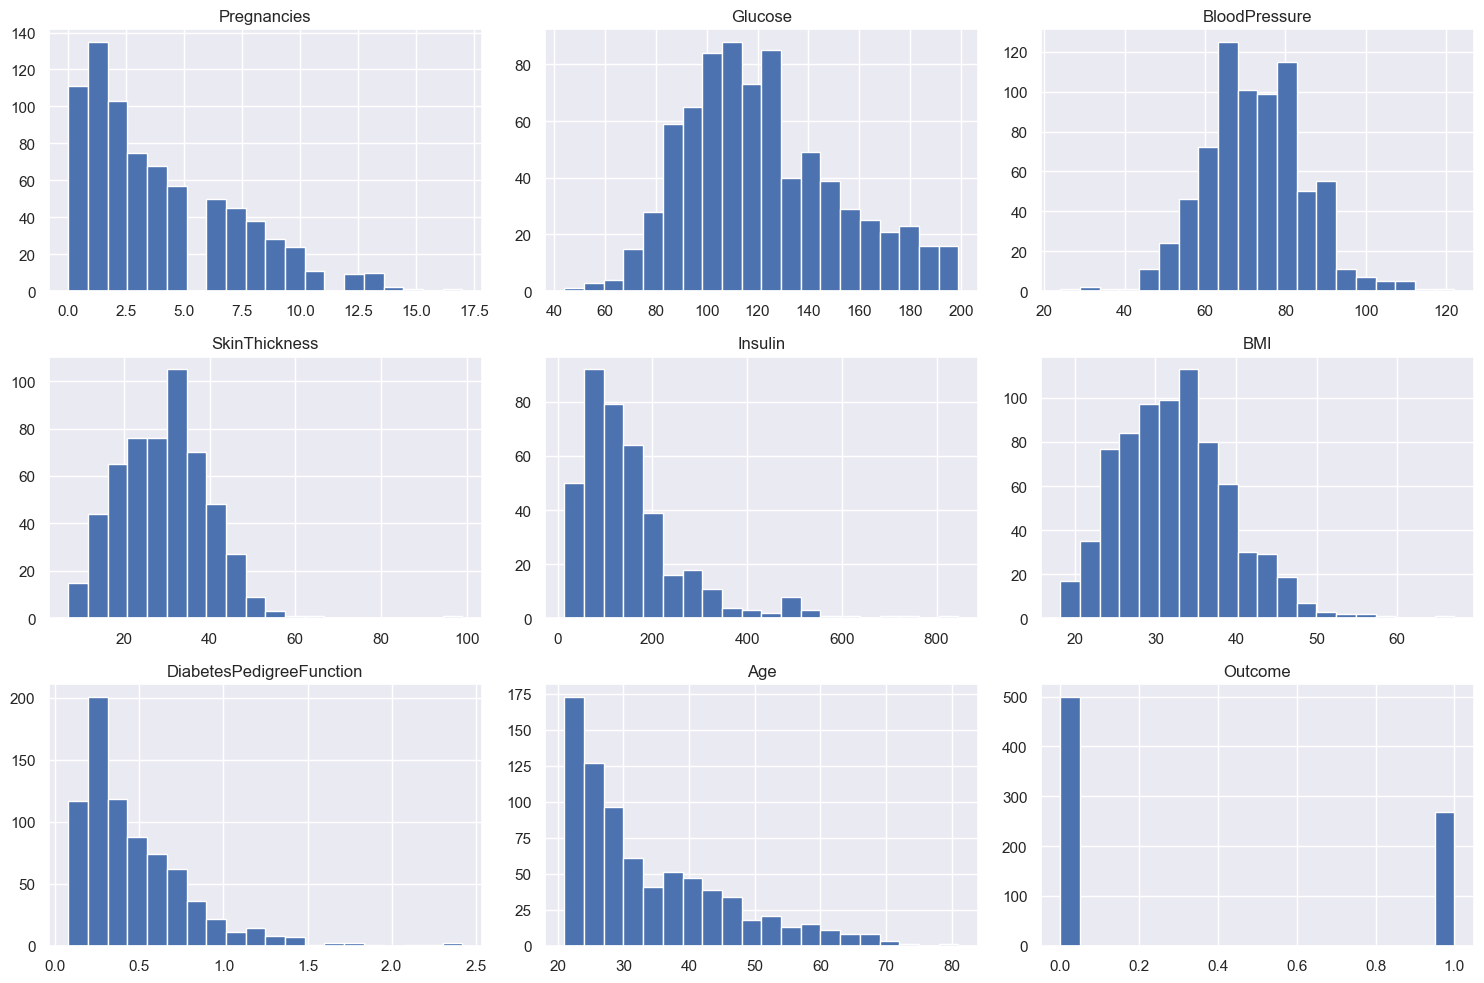

In [7]:
diabetes_data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [8]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

C:\Users\makar\AppData\Local\Temp\ipykernel_22564\2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
C:\Users\makar\AppData\Local\Temp\ipykernel_22564\2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

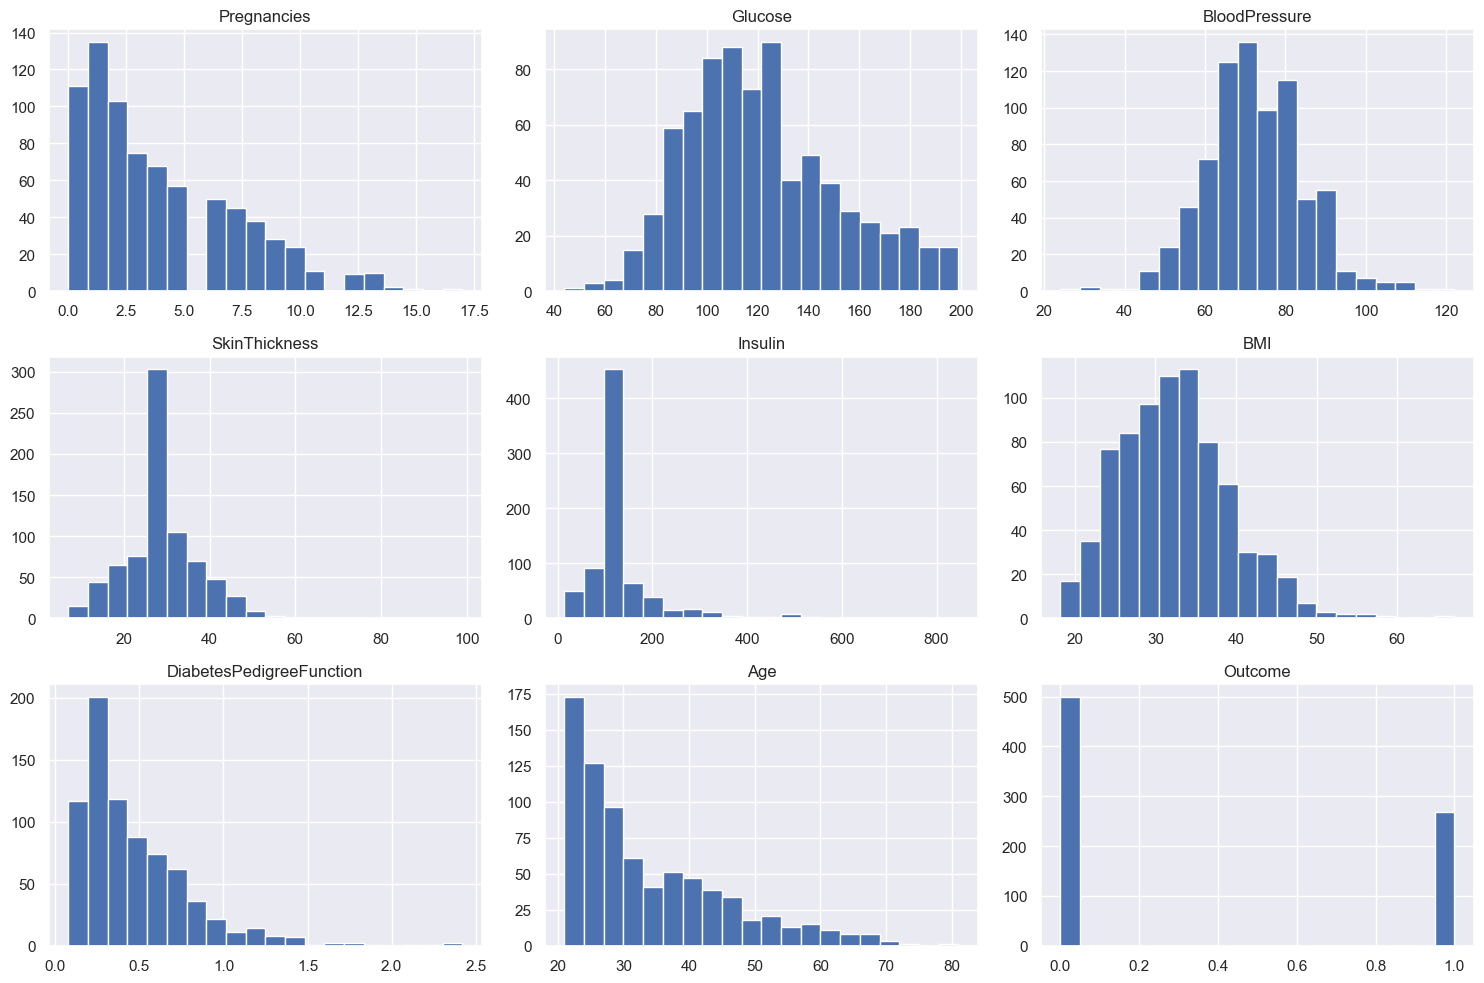

In [9]:
diabetes_data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


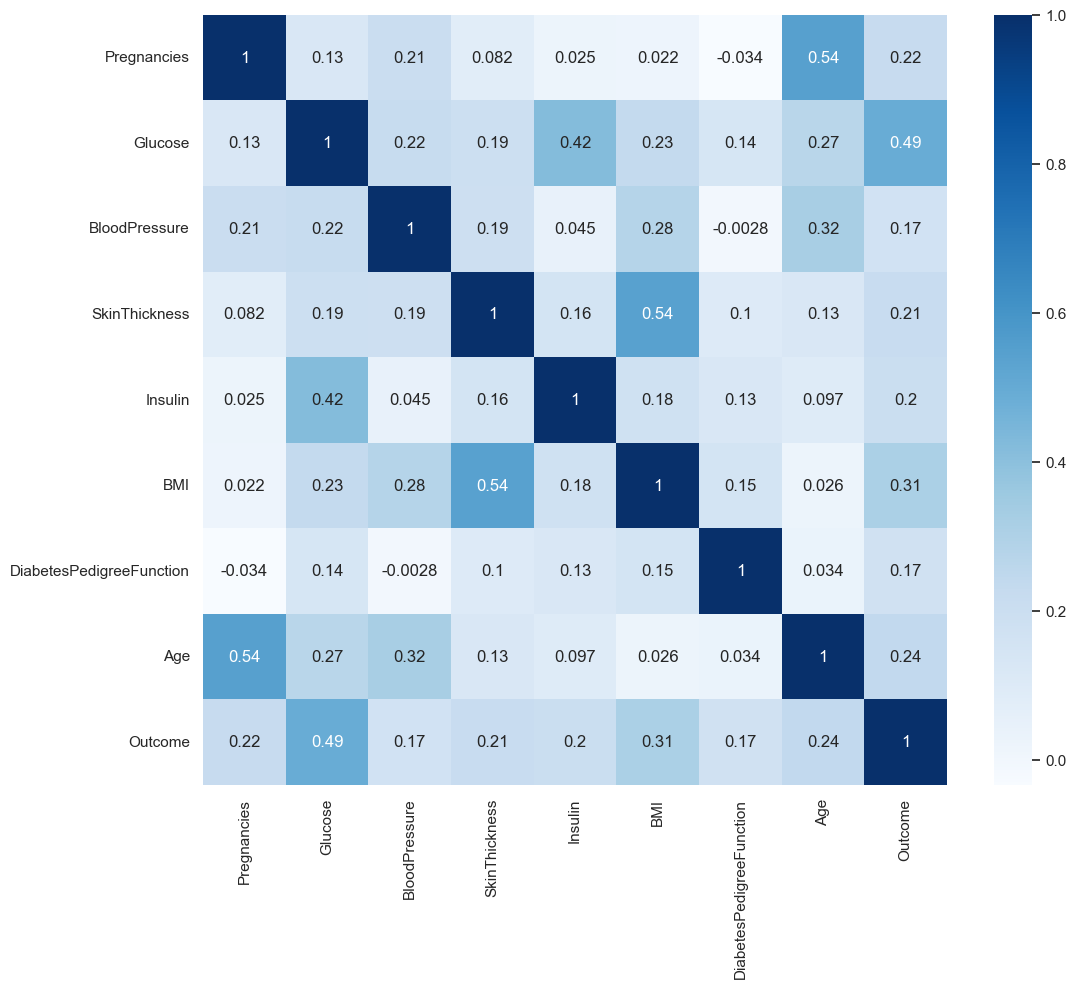

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [11]:
y = diabetes_data['Outcome']

In [16]:
X = diabetes_data.drop(columns=['Outcome'])

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [20]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [53]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

# Loop through values of k from 1 to 10
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)  # Assuming X_train and y_train are already defined
    
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # Print the train and test scores for each k value
    print(f"k={i}: Train Score = {train_score:.4f}, Test Score = {test_score:.4f}")

k=1: Train Score = 1.0000, Test Score = 0.6840
k=2: Train Score = 0.8454, Test Score = 0.7056
k=3: Train Score = 0.8399, Test Score = 0.6926
k=4: Train Score = 0.8212, Test Score = 0.7100
k=5: Train Score = 0.8212, Test Score = 0.6710
k=6: Train Score = 0.8212, Test Score = 0.7013
k=7: Train Score = 0.8119, Test Score = 0.6970
k=8: Train Score = 0.8045, Test Score = 0.6970
k=9: Train Score = 0.7952, Test Score = 0.7100
k=10: Train Score = 0.7914, Test Score = 0.7186


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [54]:
#Find the k value with the maximum score for training 
max_train_score = max(train_scores)
 
best_k_train = train_scores.index(max_train_score) + 1  # Adding 1 because index starts at 0

print(f"The number of neighbors that resulted in the maximum score in the training dataset: k={best_k_train}")

The number of neighbors that resulted in the maximum score in the training dataset: k=1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [56]:
#Find the k value with the maximum score for testing 
max_test_score = max(test_scores)
 
best_k_test = test_scores.index(max_test_score) + 1  # Adding 1 because index starts at 0

print(f"The number of neighbors that resulted in the maximum score in the testing dataset: k={best_k_test}")

The number of neighbors that resulted in the maximum score in the testing dataset: k=10


In [57]:
print(len(test_scores))
print(len(train_scores))

10
10


Plot the train and test model performance by number of neighbors.

In [59]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1200x500 with 0 Axes>

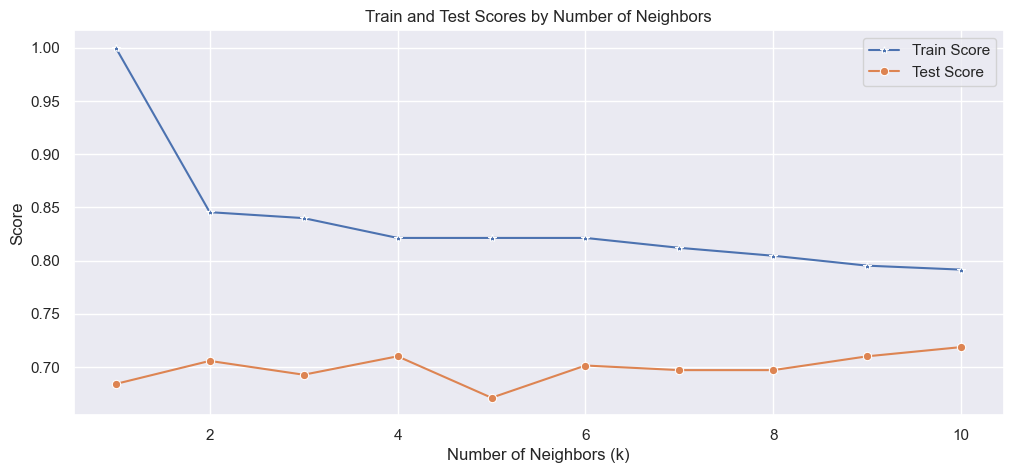

In [62]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 11), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 11), y=test_scores, marker='o', label='Test Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Train and Test Scores by Number of Neighbors')
plt.legend()
plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [97]:
# Fit the KNeighborsClassifier with the best k value (k=9)
best_k = 14
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Score the model on both the train and test datasets
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f"Train score with k={best_k}: {train_score:.4f}")
print(f"Test score with k={best_k}: {test_score:.4f}")

Train score with k=14: 0.7803
Test score with k=14: 0.7100


In [98]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

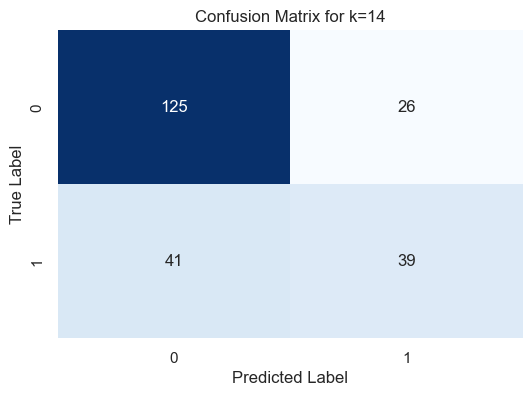

In [99]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for k={best_k}')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       151
           1       0.58      0.60      0.59        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [100]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [101]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [102]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {'n_estimators': np.arange(10, 200, 10)} 
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the grid search with 5-fold cross-validation
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)
rf_cv.fit(X, y)

# Print the best score and parameters
print("Best Score:", rf_cv.best_score_)
print("Best Parameters:", rf_cv.best_params_)

Best Score: 0.7708853238265003
Best Parameters: {'n_estimators': 30}
